# Data Analysis on Covid 19

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\BiG\Jupyter Lab\Datamining\Covid 19\Covid_19_data (1).csv")

In [3]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### we have NULL data so we have to check and delete them

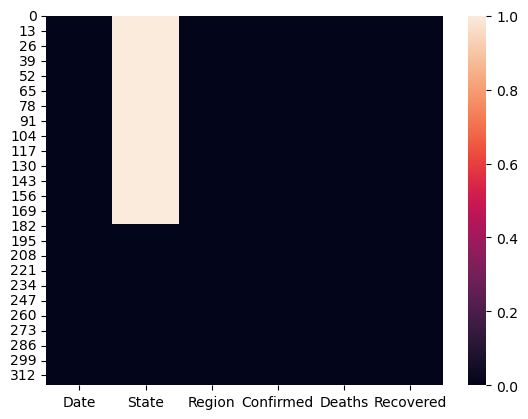

In [4]:
sns.heatmap(data.isnull())
plt.show()

In [5]:
data = data.dropna()


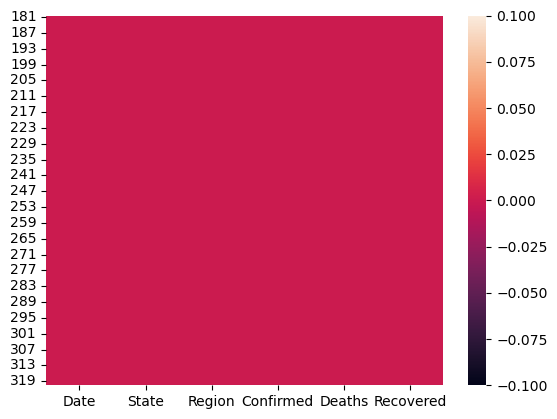

In [6]:
sns.heatmap(data.isnull())
plt.show()

### lets check some query togther!!

## Q.1) How many regions are showing zero deaths from COVID-19?

In [7]:
data.head(1)

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0


In [8]:
zero_death_regions = data[data['Deaths'] == 0]['Region']
zero_death_regions

184                UK
192       Netherlands
204                US
206                UK
207           Denmark
210            France
214                UK
215            Canada
217           Denmark
237    Mainland China
244             Macau
259            Canada
260            France
267    Mainland China
271         Australia
272            Canada
279            Canada
281    Mainland China
284            Canada
285                US
286            France
288            France
289            France
294    Mainland China
305    Mainland China
318            Canada
Name: Region, dtype: object

## Q.2) Which region has the highest recovery rate (ratio of recovered cases to confirmed cases)?

In [9]:
import pandas as pd

recovery_rates = []

# Calculate recovery rate for each region
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    confirmed_cases = region_data['Confirmed'].sum()
    recovered_cases = region_data['Recovered'].sum()
    recovery_rate = recovered_cases / confirmed_cases
    recovery_rates.append((region, recovery_rate))

# Sort recovery rates in descending order
recovery_rates.sort(key=lambda x: x[1], reverse=True)

# Print the region with the highest recovery rate
print("Region with the highest recovery rate:", recovery_rates[0][0])
print("The highest recovery rate:", recovery_rates[0][1])

Region with the highest recovery rate: Denmark
The highest recovery rate: 0.9696969696969697


## Q.3) Are there any regions where the number of recovered cases exceeds the number of confirmed cases?

In [10]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
183,4/29/2020,Alberta,Canada,5165,87,0
184,4/29/2020,Anguilla,UK,3,0,3
185,4/29/2020,Anhui,Mainland China,991,6,985


In [11]:
x=data[data['Recovered']>data['Confirmed']]

In [12]:
x["Region"].unique()

array(['Canada', 'US'], dtype=object)

## Q.4) How many regions have more than 1000 confirmed cases?

In [13]:
x=data[data['Confirmed'] > 1000]
print(x["Region"].unique())
len(x["Region"].unique())

['US' 'Canada' 'Mainland China' 'Hong Kong' 'Australia']


5

## Q.5) Which region has the highest mortality rate (ratio of deaths to confirmed cases)?

In [14]:
data["Mortality Rate"] = data["Deaths"] / data["Confirmed"]
highest_mortality_rate_region = data[data["Mortality Rate"] == data["Mortality Rate"].max()]["Region"].values[0]
print("Region with the highest mortality rate:", highest_mortality_rate_region)

Region with the highest mortality rate: Canada


C:\Users\BiG\AppData\Local\Temp\ipykernel_29232\3693035536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Mortality Rate"] = data["Deaths"] / data["Confirmed"]


## Q.6) Compare the total number of confirmed cases in Europe and Asia.

In [15]:
data.head(1)

,Date,State,Region,Confirmed,Deaths,Recovered,Mortality Rate
181,4/29/2020,Alabama,US,6912,256,0,0.037037


In [16]:
data.groupby('Region')['Confirmed'].sum()

Region
Australia            6752
Canada              52865
Denmark               198
France               1450
Hong Kong            1037
Macau                  45
Mainland China      82862
Netherlands           196
UK                   1220
US                1039909
Name: Confirmed, dtype: int64

## Q.7) How many regions have a recovery rate above 80%?

In [17]:

recovery_rates = []

# Calculate recovery rate for each region
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    confirmed_cases = region_data['Confirmed'].sum()
    recovered_cases = region_data['Recovered'].sum()
    recovery_rate = recovered_cases / confirmed_cases
    recovery_rates.append((region, recovery_rate))

# Sort recovery rates in descending order
recovery_rates.sort(key=lambda x: x[1], reverse=True)
rl=[]
for item in recovery_rates:
    if item[1] > 0.8:
        rl.append(item)

print(rl)

[('Denmark', 0.9696969696969697), ('Mainland China', 0.9366175086288046), ('Australia', 0.8464158767772512), ('Hong Kong', 0.8003857280617165)]


## Q.8) What is the average number of confirmed cases per region?

In [18]:
a=data.groupby('Region')['Confirmed'].sum()
print(a)
s=0
for item in a:
    s = s + item
    
avg=s/len(data['Region'].unique())
print('The average is : ' + str(avg))

Region
Australia            6752
Canada              52865
Denmark               198
France               1450
Hong Kong            1037
Macau                  45
Mainland China      82862
Netherlands           196
UK                   1220
US                1039909
Name: Confirmed, dtype: int64
The average is : 118653.4


## Q.9 ) Show the number of Confirmed , Deaths and Recovered cases in each Region.

In [19]:
data.groupby('Region')['Confirmed', 'Recovered','Deaths'].sum()

C:\Users\BiG\AppData\Local\Temp\ipykernel_29232\1390744451.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Confirmed', 'Recovered','Deaths'].sum()


,Confirmed,Recovered,Deaths
Region,,,
Australia,6752,5715,91
Canada,52865,20327,3155
Denmark,198,192,0
France,1450,890,34
Hong Kong,1037,830,4
Macau,45,34,0
Mainland China,82862,77610,4633
Netherlands,196,119,16
UK,1220,857,69


## Q10) Remove all the records where Confirmed Cases is Less Than 10.

In [20]:
data=data[~data['Confirmed']<10]
data

,Date,State,Region,Confirmed,Deaths,Recovered,Mortality Rate
181,4/29/2020,Alabama,US,6912,256,0,0.037037
182,4/29/2020,Alaska,US,355,9,0,0.025352
183,4/29/2020,Alberta,Canada,5165,87,0,0.016844
184,4/29/2020,Anguilla,UK,3,0,3,0.000000
185,4/29/2020,Anhui,Mainland China,991,6,985,0.006054
...,...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0,0.012844
317,4/29/2020,Xinjiang,Mainland China,76,3,73,0.039474
318,4/29/2020,Yukon,Canada,11,0,0,0.000000
319,4/29/2020,Yunnan,Mainland China,185,2,181,0.010811


## Q.11) In which Region, maximum number of Confirmed cases were recorded ?

In [21]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

## Q.12) In which Region, minimum number of Deaths cases were recorded ?

In [22]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True).head()

Region
Denmark         0
Macau           0
Hong Kong       4
Netherlands    16
France         34
Name: Deaths, dtype: int64